In [1]:
pip install alpha_vantage pandas


Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


In [3]:
from alpha_vantage.timeseries import TimeSeries
from pprint import pprint
from alpha_vantage.techindicators import TechIndicators
from datetime import date
from datetime import timedelta

import matplotlib.pyplot as plt 
import sys
import pandas as pd
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Ridge
import plotly.express as px
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

import math
from sklearn.metrics import r2_score
from numpy import arange
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.metrics import accuracy_score
import seaborn as sns







In [4]:
# Obtaining stock data from alpha vantage 
sym='AAPL'


# funtion to obtain data from alpha vantage API
def stock_data(sym, date_of_data):
    
    ts = TimeSeries(key='SUXOFAIGXM6HEP9Y', output_format='pandas')
    data, meta_data = ts.get_daily_adjusted(symbol=sym, outputsize='full')
    data_date_changed = data[:date_of_data]
    data_date_changed['Ticker']= sym
    return data_date_changed

In [5]:
# Function to plot interactive plots using Plotly Express
def interactive_plot(df, title):
  fig = px.line(title = title)
  for i in df.columns[1:]:
    fig.add_scatter(x = df['date'], y = df[i], name = i)
  fig.show()

In [6]:
data_dated= stock_data(sym,'2015-01-01')

<ipython-input-4-bbd3d18a26a8>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_date_changed['Ticker']= sym


In [7]:
data_dated.head(10)

1. open   2. high    3. low  4. close  5. adjusted close  \
date                                                                   
2021-04-08   128.95  130.3900  128.5200    130.36             130.36   
2021-04-07   125.83  127.9200  125.1400    127.90             127.90   
2021-04-06   126.50  127.1300  125.6500    126.21             126.21   
2021-04-05   123.87  126.1601  123.0700    125.90             125.90   
2021-04-01   123.66  124.1800  122.4900    123.00             123.00   
2021-03-31   121.65  123.5200  121.1500    122.15             122.15   
2021-03-30   120.11  120.4031  118.8600    119.90             119.90   
2021-03-29   121.65  122.5800  120.7299    121.39             121.39   
2021-03-26   120.35  121.4800  118.9200    121.21             121.21   
2021-03-25   119.54  121.6600  119.0000    120.59             120.59   

              6. volume  7. dividend amount  8. split coefficient Ticker  
date                                                                      
2021-04-08   88308977.0                 0.0                   1.0   AAPL  
2021-04-07   83466716.0                 0.0                   1.0   AAPL  
2021-04-06   80171253.0                 0.0                   1.0   AAPL  
2021-04-05   88651175.0                 0.0                   1.0   AAPL  
2021-04-01   75089134.0                 0.0                   1.0   AAPL  
2021-03-31  118323826.0                 0.0                   1.0   AAPL  
2021-03-30   85671919.0                 0.0                   1.0   AAPL  
2021-03-29   80819203.0                 0.0                   1.0   AAPL  
2021-03-26   94071234.0                 0.0                   1.0   AAPL  
2021-03-25   98844681.0                 0.0                   1.0   AAPL

In [8]:
# Check if Null values exist in stock prices data
data_dated.isnull().sum()

1. open                 0
2. high                 0
3. low                  0
4. close                0
5. adjusted close       0
6. volume               0
7. dividend amount      0
8. split coefficient    0
Ticker                  0
dtype: int64

In [9]:
# Get stock prices dataframe info
data_dated.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1577 entries, 2021-04-08 to 2015-01-02
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   1. open               1577 non-null   float64
 1   2. high               1577 non-null   float64
 2   3. low                1577 non-null   float64
 3   4. close              1577 non-null   float64
 4   5. adjusted close     1577 non-null   float64
 5   6. volume             1577 non-null   float64
 6   7. dividend amount    1577 non-null   float64
 7   8. split coefficient  1577 non-null   float64
 8   Ticker                1577 non-null   object 
dtypes: float64(8), object(1)
memory usage: 123.2+ KB


In [10]:
data_dated.describe()

1. open      2. high       3. low     4. close  5. adjusted close  \
count  1577.000000  1577.000000  1577.000000  1577.000000        1577.000000   
mean    170.144515   171.919414   168.472926   170.292679          50.091160   
std      71.740472    72.790015    70.931586    72.017324          29.947759   
min      90.000000    91.670000    89.470000    90.340000          21.131248   
25%     117.520000   118.705000   116.330000   117.340000          28.134139   
50%     151.800000   153.840000   150.050000   152.540000          40.972112   
75%     197.990000   199.850000   195.930000   197.920000          54.845728   
max     514.790000   515.140000   500.330000   506.090000         142.945728   

          6. volume  7. dividend amount  8. split coefficient  
count  1.577000e+03         1577.000000           1577.000000  
mean   4.481613e+07            0.009765              1.001902  
std    3.376211e+07            0.079542              0.075545  
min    1.136204e+07            0.000000              1.000000  
25%    2.514149e+07            0.000000              1.000000  
50%    3.357846e+07            0.000000              1.000000  
75%    4.989991e+07            0.000000              1.000000  
max    3.326072e+08            0.820000              4.000000

In [11]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(data_dated.corr(), center=0, cmap='Blues' , annot=True)
ax.set_title('Multi-Collinearity of Car Attributes')

Text(0.5, 1.0, 'Multi-Collinearity of Car Attributes')

In [12]:
# Function to return the input/output (target) data for AI/ML Model
# Note that our goal is to predict the future stock price 
# Target stock price today will be tomorrow's price 
def trading_window(data,days):
  
  # 1 day window 
#   n = 1

  # Create a column containing the prices for the next 1 days
  data['Target'] = data[['4. close']].shift(-days)
  
  # return the new dataset 
  return data

In [13]:
df=data_dated.copy()

In [14]:
# calculate the change in price from the previous day
data_dated['change_in_price'] = data_dated['4. close'].diff()

In [15]:
data_dated

1. open   2. high   3. low  4. close  5. adjusted close  \
date                                                                  
2021-04-08   128.95  130.3900  128.520    130.36         130.360000   
2021-04-07   125.83  127.9200  125.140    127.90         127.900000   
2021-04-06   126.50  127.1300  125.650    126.21         126.210000   
2021-04-05   123.87  126.1601  123.070    125.90         125.900000   
2021-04-01   123.66  124.1800  122.490    123.00         123.000000   
...             ...       ...      ...       ...                ...   
2015-01-08   109.23  112.1500  108.700    111.89          25.441309   
2015-01-07   107.20  108.2000  106.695    107.75          24.499965   
2015-01-06   106.54  107.4300  104.630    106.26          24.161172   
2015-01-05   108.29  108.6500  105.410    106.25          24.158898   
2015-01-02   111.39  111.4400  107.350    109.33          24.859222   

             6. volume  7. dividend amount  8. split coefficient Ticker  \
date                                                                      
2021-04-08  88308977.0                 0.0                   1.0   AAPL   
2021-04-07  83466716.0                 0.0                   1.0   AAPL   
2021-04-06  80171253.0                 0.0                   1.0   AAPL   
2021-04-05  88651175.0                 0.0                   1.0   AAPL   
2021-04-01  75089134.0                 0.0                   1.0   AAPL   
...                ...                 ...                   ...    ...   
2015-01-08  59364547.0                 0.0                   1.0   AAPL   
2015-01-07  40105934.0                 0.0                   1.0   AAPL   
2015-01-06  65797116.0                 0.0                   1.0   AAPL   
2015-01-05  64285491.0                 0.0                   1.0   AAPL   
2015-01-02  53204626.0                 0.0                   1.0   AAPL   

            change_in_price  
date                         
2021-04-08              NaN  
2021-04-07            -2.46  
2021-04-06            -1.69  
2021-04-05            -0.31  
2021-04-01            -2.90  
...                     ...  
2015-01-08            -0.12  
2015-01-07            -4.14  
2015-01-06            -1.49  
2015-01-05            -0.01  
2015-01-02             3.08  

[1577 rows x 10 columns]

In [16]:
# calculating the Relative Strength Index

def calc_RSI(data_dated):
    # Calculate the 14 day RSI
    n = 14

    # First make a copy of the data frame twice
    up_df, down_df = data_dated[['Ticker','change_in_price']].copy(), data_dated[['Ticker','change_in_price']].copy()

    # For up days, if the change is less than 0 set to 0.
    up_df.loc['change_in_price'] = up_df.loc[(up_df['change_in_price'] < 0), 'change_in_price'] = 0

    # For down days, if the change is greater than 0 set to 0.
    down_df.loc['change_in_price'] = down_df.loc[(down_df['change_in_price'] > 0), 'change_in_price'] = 0

    # We need change in price to be absolute.
    down_df['change_in_price'] = down_df['change_in_price'].abs()

    # Calculate the EWMA (Exponential Weighted Moving Average), meaning older values are given less weight compared to newer values.
    ewma_up = up_df.groupby('Ticker')['change_in_price'].transform(lambda x: x.ewm(span = n).mean())
    ewma_down = down_df.groupby('Ticker')['change_in_price'].transform(lambda x: x.ewm(span = n).mean())

    # Calculate the Relative Strength
    relative_strength = ewma_up / ewma_down

    # Calculate the Relative Strength Index
    relative_strength_index = 100.0 - (100.0 / (1.0 + relative_strength))

    # Add the info to the data frame.
    data_dated['down_days'] = down_df['change_in_price']
    data_dated['up_days'] = up_df['change_in_price']
    data_dated['RSI'] = relative_strength_index

calc_RSI(data_dated)
# Display the head.
data_dated.head(30)

1. open   2. high    3. low  4. close  5. adjusted close  \
date                                                                   
2021-04-08   128.95  130.3900  128.5200   130.360            130.360   
2021-04-07   125.83  127.9200  125.1400   127.900            127.900   
2021-04-06   126.50  127.1300  125.6500   126.210            126.210   
2021-04-05   123.87  126.1601  123.0700   125.900            125.900   
2021-04-01   123.66  124.1800  122.4900   123.000            123.000   
2021-03-31   121.65  123.5200  121.1500   122.150            122.150   
2021-03-30   120.11  120.4031  118.8600   119.900            119.900   
2021-03-29   121.65  122.5800  120.7299   121.390            121.390   
2021-03-26   120.35  121.4800  118.9200   121.210            121.210   
2021-03-25   119.54  121.6600  119.0000   120.590            120.590   
2021-03-24   122.82  122.9000  120.0650   120.090            120.090   
2021-03-23   123.33  124.2400  122.1400   122.540            122.540   
2021-03-22   120.33  123.8700  120.2600   123.390            123.390   
2021-03-19   119.90  121.4300  119.6750   119.990            119.990   
2021-03-18   122.88  123.1800  120.3200   120.530            120.530   
2021-03-17   124.05  125.8599  122.3360   124.760            124.760   
2021-03-16   125.70  127.2200  124.7150   125.570            125.570   
2021-03-15   121.41  124.0000  120.4200   123.990            123.990   
2021-03-12   120.40  121.1700  119.1600   121.030            121.030   
2021-03-11   122.54  123.2100  121.2600   121.960            121.960   
2021-03-10   121.69  122.1700  119.4500   119.980            119.980   
2021-03-09   119.03  122.0600  118.7900   121.085            121.085   
2021-03-08   120.93  121.0000  116.2100   116.360            116.360   
2021-03-05   120.98  121.9350  117.5700   121.420            121.420   
2021-03-04   121.75  123.6000  118.6200   120.130            120.130   
2021-03-03   124.81  125.7100  121.8400   122.060            122.060   
2021-03-02   128.41  128.7200  125.0100   125.120            125.120   
2021-03-01   123.75  127.9300  122.7900   127.790            127.790   
2021-02-26   122.59  124.8500  121.2000   121.260            121.260   
2021-02-25   124.68  126.4585  120.5400   120.990            120.990   

              6. volume  7. dividend amount  8. split coefficient Ticker  \
date                                                                       
2021-04-08   88308977.0                 0.0                   1.0   AAPL   
2021-04-07   83466716.0                 0.0                   1.0   AAPL   
2021-04-06   80171253.0                 0.0                   1.0   AAPL   
2021-04-05   88651175.0                 0.0                   1.0   AAPL   
2021-04-01   75089134.0                 0.0                   1.0   AAPL   
2021-03-31  118323826.0                 0.0                   1.0   AAPL   
2021-03-30   85671919.0                 0.0                   1.0   AAPL   
2021-03-29   80819203.0                 0.0                   1.0   AAPL   
2021-03-26   94071234.0                 0.0                   1.0   AAPL   
2021-03-25   98844681.0                 0.0                   1.0   AAPL   
2021-03-24   88530485.0                 0.0                   1.0   AAPL   
2021-03-23   95467142.0                 0.0                   1.0   AAPL   
2021-03-22  111912284.0                 0.0                   1.0   AAPL   
2021-03-19  185549522.0                 0.0                   1.0   AAPL   
2021-03-18  121469755.0                 0.0                   1.0   AAPL   
2021-03-17  111932636.0                 0.0                   1.0   AAPL   
2021-03-16  115227936.0                 0.0                   1.0   AAPL   
2021-03-15   92590555.0                 0.0                   1.0   AAPL   
2021-03-12   88105050.0                 0.0                   1.0   AAPL   
2021-03-11  103026514.0                 0.0                   1.0   AAPL   
2021-03-10  111943326.0            

In [17]:
# Claclulting the Stochastic Oscillator
def stochastic_Oscillator(data_dated):

    # Calculate the Stochastic Oscillator
    n = 14

    # Make a copy of the high and low column.
    low_14, high_14 = data_dated[['Ticker','3. low']].copy(), data_dated[['Ticker','2. high']].copy()

    # Group by symbol, then apply the rolling function and grab the Min and Max.
    low_14 = low_14.groupby('Ticker')['3. low'].transform(lambda x: x.rolling(window = n).min())
    high_14 = high_14.groupby('Ticker')['2. high'].transform(lambda x: x.rolling(window = n).max())

    # Calculate the Stochastic Oscillator.
    k_percent = 100 * ((data_dated['4. close'] - low_14) / (high_14 - low_14))

    # Add the info to the data frame.
    data_dated['low_14'] = low_14
    data_dated['high_14'] = high_14
    data_dated['k_percent'] = k_percent


stochastic_Oscillator(data_dated)
# Display the head.
data_dated.head(5)

1. open   2. high  3. low  4. close  5. adjusted close  \
date                                                                 
2021-04-08   128.95  130.3900  128.52    130.36             130.36   
2021-04-07   125.83  127.9200  125.14    127.90             127.90   
2021-04-06   126.50  127.1300  125.65    126.21             126.21   
2021-04-05   123.87  126.1601  123.07    125.90             125.90   
2021-04-01   123.66  124.1800  122.49    123.00             123.00   

             6. volume  7. dividend amount  8. split coefficient Ticker  \
date                                                                      
2021-04-08  88308977.0                 0.0                   1.0   AAPL   
2021-04-07  83466716.0                 0.0                   1.0   AAPL   
2021-04-06  80171253.0                 0.0                   1.0   AAPL   
2021-04-05  88651175.0                 0.0                   1.0   AAPL   
2021-04-01  75089134.0                 0.0                   1.0   AAPL   

            change_in_price  down_days  up_days  RSI  low_14  high_14  \
date                                                                    
2021-04-08              NaN        NaN      NaN  NaN     NaN      NaN   
2021-04-07            -2.46       2.46      0.0  0.0     NaN      NaN   
2021-04-06            -1.69       1.69      0.0  0.0     NaN      NaN   
2021-04-05            -0.31       0.31      0.0  0.0     NaN      NaN   
2021-04-01            -2.90       2.90      0.0  0.0     NaN      NaN   

            k_percent  
date                   
2021-04-08        NaN  
2021-04-07        NaN  
2021-04-06        NaN  
2021-04-05        NaN  
2021-04-01        NaN

In [18]:
# calculating williams R%
def calc_williams_r(data_dated):
# Calculate the Williams %R
    n = 14
    # Make a copy of the high and low column.
    low_14, high_14 = data_dated[['Ticker','3. low']].copy(), data_dated[['Ticker','2. high']].copy()
    # Group by symbol, then apply the rolling function and grab the Min and Max.
    low_14 = low_14.groupby('Ticker')['3. low'].transform(lambda x: x.rolling(window = n).min())
    high_14 = high_14.groupby('Ticker')['2. high'].transform(lambda x: x.rolling(window = n).max())
    # Calculate William %R indicator.
    r_percent = ((high_14 - data_dated['4. close']) / (high_14 - low_14)) * - 100
    # Add the info to the data frame.
    data_dated['r_percent'] = r_percent


calc_williams_r(data_dated)
# Display the head.
data_dated.head(5)

1. open   2. high  3. low  4. close  5. adjusted close  \
date                                                                 
2021-04-08   128.95  130.3900  128.52    130.36             130.36   
2021-04-07   125.83  127.9200  125.14    127.90             127.90   
2021-04-06   126.50  127.1300  125.65    126.21             126.21   
2021-04-05   123.87  126.1601  123.07    125.90             125.90   
2021-04-01   123.66  124.1800  122.49    123.00             123.00   

             6. volume  7. dividend amount  8. split coefficient Ticker  \
date                                                                      
2021-04-08  88308977.0                 0.0                   1.0   AAPL   
2021-04-07  83466716.0                 0.0                   1.0   AAPL   
2021-04-06  80171253.0                 0.0                   1.0   AAPL   
2021-04-05  88651175.0                 0.0                   1.0   AAPL   
2021-04-01  75089134.0                 0.0                   1.0   AAPL   

            change_in_price  down_days  up_days  RSI  low_14  high_14  \
date                                                                    
2021-04-08              NaN        NaN      NaN  NaN     NaN      NaN   
2021-04-07            -2.46       2.46      0.0  0.0     NaN      NaN   
2021-04-06            -1.69       1.69      0.0  0.0     NaN      NaN   
2021-04-05            -0.31       0.31      0.0  0.0     NaN      NaN   
2021-04-01            -2.90       2.90      0.0  0.0     NaN      NaN   

            k_percent  r_percent  
date                              
2021-04-08        NaN        NaN  
2021-04-07        NaN        NaN  
2021-04-06        NaN        NaN  
2021-04-05        NaN        NaN  
2021-04-01        NaN        NaN

In [19]:
# calculating the Moving Average Convergence Divergnece (MACD)
def calc_macd(data_dated):
    # Calculate the MACD
    ema_26 = data_dated.groupby('Ticker')['4. close'].transform(lambda x: x.ewm(span = 26).mean())
    ema_12 = data_dated.groupby('Ticker')['4. close'].transform(lambda x: x.ewm(span = 12).mean())
    macd = ema_12 - ema_26

    # Calculate the EMA
    ema_9_macd = macd.ewm(span = 9).mean()

    # Store the data in the data frame.
    data_dated['MACD'] = macd
    data_dated['MACD_EMA'] = ema_9_macd
    

calc_macd(data_dated)   
# Print the head.
data_dated.head(5)

1. open   2. high  3. low  4. close  5. adjusted close  \
date                                                                 
2021-04-08   128.95  130.3900  128.52    130.36             130.36   
2021-04-07   125.83  127.9200  125.14    127.90             127.90   
2021-04-06   126.50  127.1300  125.65    126.21             126.21   
2021-04-05   123.87  126.1601  123.07    125.90             125.90   
2021-04-01   123.66  124.1800  122.49    123.00             123.00   

             6. volume  7. dividend amount  8. split coefficient Ticker  \
date                                                                      
2021-04-08  88308977.0                 0.0                   1.0   AAPL   
2021-04-07  83466716.0                 0.0                   1.0   AAPL   
2021-04-06  80171253.0                 0.0                   1.0   AAPL   
2021-04-05  88651175.0                 0.0                   1.0   AAPL   
2021-04-01  75089134.0                 0.0                   1.0   AAPL   

            change_in_price  down_days  up_days  RSI  low_14  high_14  \
date                                                                    
2021-04-08              NaN        NaN      NaN  NaN     NaN      NaN   
2021-04-07            -2.46       2.46      0.0  0.0     NaN      NaN   
2021-04-06            -1.69       1.69      0.0  0.0     NaN      NaN   
2021-04-05            -0.31       0.31      0.0  0.0     NaN      NaN   
2021-04-01            -2.90       2.90      0.0  0.0     NaN      NaN   

            k_percent  r_percent      MACD  MACD_EMA  
date                                                  
2021-04-08        NaN        NaN  0.000000  0.000000  
2021-04-07        NaN        NaN -0.055192 -0.030662  
2021-04-06        NaN        NaN -0.122733 -0.068396  
2021-04-05        NaN        NaN -0.161636 -0.099981  
2021-04-01        NaN        NaN -0.294770 -0.157927

In [20]:
# calculating the price rate of change 
def calc_price_rate_of_change(data_dated):
    # Calculate the Price Rate of Change
    n = 9

    # Calculate the Rate of Change in the Price, and store it in the Data Frame.
    data_dated['Price_Rate_Of_Change'] = data_dated.groupby('Ticker')['4. close'].transform(lambda x: x.pct_change(periods = n))

calc_price_rate_of_change(data_dated)
# Print the first 30 rows
data_dated.head(5)

1. open   2. high  3. low  4. close  5. adjusted close  \
date                                                                 
2021-04-08   128.95  130.3900  128.52    130.36             130.36   
2021-04-07   125.83  127.9200  125.14    127.90             127.90   
2021-04-06   126.50  127.1300  125.65    126.21             126.21   
2021-04-05   123.87  126.1601  123.07    125.90             125.90   
2021-04-01   123.66  124.1800  122.49    123.00             123.00   

             6. volume  7. dividend amount  8. split coefficient Ticker  \
date                                                                      
2021-04-08  88308977.0                 0.0                   1.0   AAPL   
2021-04-07  83466716.0                 0.0                   1.0   AAPL   
2021-04-06  80171253.0                 0.0                   1.0   AAPL   
2021-04-05  88651175.0                 0.0                   1.0   AAPL   
2021-04-01  75089134.0                 0.0                   1.0   AAPL   

            change_in_price  down_days  up_days  RSI  low_14  high_14  \
date                                                                    
2021-04-08              NaN        NaN      NaN  NaN     NaN      NaN   
2021-04-07            -2.46       2.46      0.0  0.0     NaN      NaN   
2021-04-06            -1.69       1.69      0.0  0.0     NaN      NaN   
2021-04-05            -0.31       0.31      0.0  0.0     NaN      NaN   
2021-04-01            -2.90       2.90      0.0  0.0     NaN      NaN   

            k_percent  r_percent      MACD  MACD_EMA  Price_Rate_Of_Change  
date                                                                        
2021-04-08        NaN        NaN  0.000000  0.000000                   NaN  
2021-04-07        NaN        NaN -0.055192 -0.030662                   NaN  
2021-04-06        NaN        NaN -0.122733 -0.068396                   NaN  
2021-04-05        NaN        NaN -0.161636 -0.099981                   NaN  
2021-04-01        NaN        NaN -0.294770 -0.157927                   NaN

In [21]:
data_dated = trading_window(data_dated,10)

In [22]:
data_dated = data_dated[:-1]

In [23]:
data_dated.reset_index(inplace = True) 

In [24]:
data_dated.drop(['Ticker','2. high','3. low', '1. open', '5. adjusted close', '7. dividend amount', '6. volume', '8. split coefficient', 'low_14','high_14','MACD_EMA'], axis = 1, inplace=True) 

/Users/aesthetic/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [25]:
df_lstm=data_dated.copy()
df_RandomForest=data_dated.copy()
copy_df=data_dated.copy()

In [26]:
data_dated.head(10)

date  4. close  change_in_price  down_days  up_days        RSI  \
0 2021-04-08    130.36              NaN        NaN      NaN        NaN   
1 2021-04-07    127.90            -2.46       2.46     0.00   0.000000   
2 2021-04-06    126.21            -1.69       1.69     0.00   0.000000   
3 2021-04-05    125.90            -0.31       0.31     0.00   0.000000   
4 2021-04-01    123.00            -2.90       2.90     0.00   0.000000   
5 2021-03-31    122.15            -0.85       0.85     0.00   0.000000   
6 2021-03-30    119.90            -2.25       2.25     0.00   0.000000   
7 2021-03-29    121.39             1.49       0.00     1.49  18.602029   
8 2021-03-26    121.21            -0.18       0.18     0.00  18.131878   
9 2021-03-25    120.59            -0.62       0.62     0.00  16.476806   

   k_percent  r_percent      MACD  Price_Rate_Of_Change  Target  
0        NaN        NaN  0.000000                   NaN  120.09  
1        NaN        NaN -0.055192                   NaN  122.54  
2        NaN        NaN -0.122733                   NaN  123.39  
3        NaN        NaN -0.161636                   NaN  119.99  
4        NaN        NaN -0.294770                   NaN  120.53  
5        NaN        NaN -0.405608                   NaN  124.76  
6        NaN        NaN -0.571631                   NaN  125.57  
7        NaN        NaN -0.602900                   NaN  123.99  
8        NaN        NaN -0.624310                   NaN  121.03  
9        NaN        NaN -0.662351             -0.074946  121.96

In [27]:
# Any row that has a `NaN` value will be dropped.
data_dated = data_dated.dropna()

In [28]:
cv = KFold(n_splits=10, random_state=None, shuffle=False)
sc = MinMaxScaler(feature_range = (0, 1))

In [29]:
X = data_dated.iloc[:, :-1]
y = data_dated.iloc[:, -1]

In [30]:
cv.split(X)

<generator object _BaseKFold.split at 0x7f8b2e75fb30>

In [31]:
# alphas = 10**np.linspace(10,-2,100)*0.5
# alphas

In [32]:
df_lstm=df_lstm.reset_index()

In [33]:

# regression_model = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error', normalize = True)
regression_model = Ridge()

 
Accuracy for Split 1
0.19724017792457416
MSE: 0.05612785329835776
RMSE: 0.23691317670901668
Rsquared 0.19724017792457416
MAE: 0.10745596262669582
 
 
Accuracy for Split 2
0.7210413144418353
MSE: 0.011781644849957251
RMSE: 0.10854328560513198
Rsquared 0.7210413144418353
MAE: 0.08576235420862911
 
 
Accuracy for Split 3
0.9249625918434886
MSE: 0.004905148570651553
RMSE: 0.07003676584945619
Rsquared 0.9249625918434886
MAE: 0.05527847155848406
 
 
Accuracy for Split 4
0.7125877324485097
MSE: 0.017962083456243616
RMSE: 0.1340226975412882
Rsquared 0.7125877324485097
MAE: 0.11050545698064172
 
 
Accuracy for Split 5
0.7995869061352612
MSE: 0.01499340112602109
RMSE: 0.12244754438542689
Rsquared 0.7995869061352612
MAE: 0.09335920203109699
 
 
Accuracy for Split 6
0.3586998792227495
MSE: 0.04329051964172805
RMSE: 0.20806373937264525
Rsquared 0.3586998792227495
MAE: 0.15993695141749184
 
 
Accuracy for Split 7
0.8808597551572329
MSE: 0.010428763955564316
RMSE: 0.1021213197895734
Rsquared 0.8808

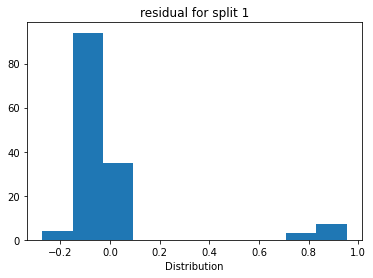

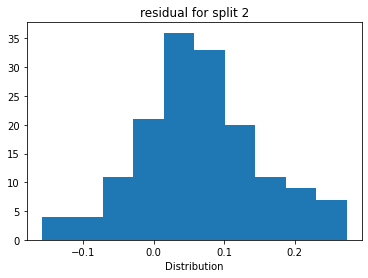

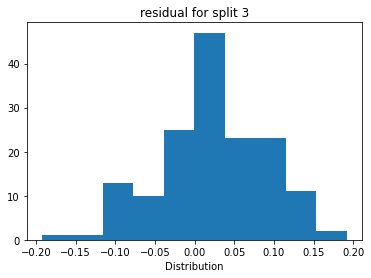

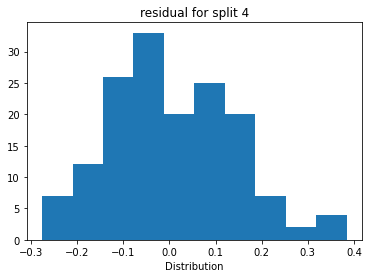

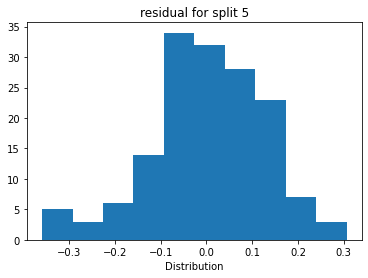

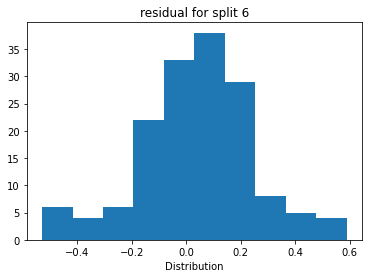

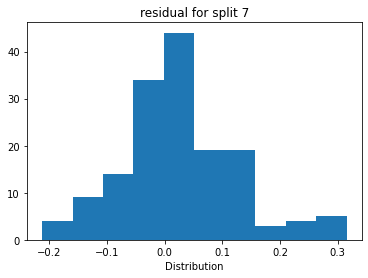

In [34]:
accuracy_scores=[]
mse=[]
rmse=[]
rsquared=[]
mae=[]

p=1


for train_index, test_index in cv.split(X):
    X_train, X_test =X.reindex(train_index), X.reindex(test_index)
    y_train, y_test = y.reindex(train_index), y.reindex(test_index).reset_index(drop=True)
    y_train = y_train.dropna()
    X_train = X_train.dropna()
    y_test = y_test.dropna()
    X_test = X_test.dropna()
    
    

    X_train= sc.fit_transform(X_train.iloc[:, 1:])  
    X_test= sc.fit_transform(X_test.iloc[:, 1:])  
    y_train=sc.fit_transform(y_train.values.reshape(-1,1)) 
    y_test= sc.fit_transform(y_test.values.reshape(-1, 1)) 

    
    regression_model.fit(X_train, y_train)
    print(" ")
    print('Accuracy for Split '+ str(p))
    print(regression_model.score(X_test, y_test))
    accuracy_scores.append(regression_model.score(X_test, y_test))

    pred = regression_model.predict(X_test)
    residual= y_test-pred
   
    fig, ax = plt.subplots()
    ax.hist( residual)
    print('MSE: ' +str(mean_squared_error(y_test, pred)))
    mse.append(mean_squared_error(y_test, pred))
    print('RMSE: ' + str(math.sqrt(mean_squared_error(y_test, pred))))
    rmse.append(math.sqrt(mean_squared_error(y_test, pred)))
    print('Rsquared '+ str(r2_score(y_test, pred)))
    rsquared.append(r2_score(y_test, pred))
    print('MAE: ' + str(mean_absolute_error(y_test, pred)))
    mae.append(mean_absolute_error(y_test, pred))
    print(" ")
 
    ax.set_title('residual for split ' + str(p))
    ax.set_xlabel("Distribution")
    p +=1
    
    
    
    
    
    
accuracy_avg= np.mean(accuracy_scores)
print('Average Accuracy ='+ str(accuracy_avg))

mse_avg= np.mean(mse)
print('Average MSE ='+ str(mse_avg))

rmse_avg= np.mean(rmse)
print('Average RMSE ='+ str(rmse_avg))

rsquared_avg= np.mean(rsquared)
print('Average Rsquared =' + str(rsquared_avg))

mae_avg= np.mean(mae)
print('Average MAE =' + str(mae_avg))

    


In [35]:
X

date  4. close  change_in_price  down_days  up_days        RSI  \
13   2021-03-19    119.99            -3.40       3.40     0.00  31.657415   
14   2021-03-18    120.53             0.54       0.00     0.54  35.615852   
15   2021-03-17    124.76             4.23       0.00     4.23  57.739658   
16   2021-03-16    125.57             0.81       0.00     0.81  60.721779   
17   2021-03-15    123.99            -1.58       1.58     0.00  52.399548   
...         ...       ...              ...        ...      ...        ...   
1562 2015-01-23    112.98            -0.12       0.12     0.00  33.089546   
1563 2015-01-22    112.40            -0.58       0.58     0.00  31.730474   
1564 2015-01-21    109.55            -2.85       2.85     0.00  25.737048   
1565 2015-01-20    108.72            -0.83       0.83     0.00  24.200973   
1566 2015-01-16    105.99            -2.73       2.73     0.00  19.731583   

      k_percent  r_percent      MACD  Price_Rate_Of_Change  
13     9.800520 -90.199480 -0.544828             -0.024472  
14    18.432671 -81.567329 -0.571785             -0.013262  
15    71.342201 -28.657799 -0.328505              0.040534  
16    80.263158 -19.736842 -0.088767              0.034434  
17    61.363636 -38.636364 -0.003696              0.022935  
...         ...        ...       ...                   ...  
1562  24.858402 -75.141598 -3.685487             -0.058029  
1563  25.685976 -74.314024 -3.766525             -0.059886  
1564  10.457516 -89.542484 -4.014442             -0.076696  
1565  15.845824 -84.154176 -4.229142             -0.083537  
1566   5.160026 -94.839974 -4.566937             -0.095340  

[1554 rows x 10 columns]

# Random Forest Model

In [36]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000)
# Train the model on training data


In [37]:
df_RandomForest=df_RandomForest.drop(['date'], axis = 1) 

In [38]:
X_RandomForest = X
y_RandomForest = y

In [39]:
X_RandomForest.head(10)

date  4. close  change_in_price  down_days  up_days        RSI  \
13 2021-03-19   119.990           -3.400      3.400    0.000  31.657415   
14 2021-03-18   120.530            0.540      0.000    0.540  35.615852   
15 2021-03-17   124.760            4.230      0.000    4.230  57.739658   
16 2021-03-16   125.570            0.810      0.000    0.810  60.721779   
17 2021-03-15   123.990           -1.580      1.580    0.000  52.399548   
18 2021-03-12   121.030           -2.960      2.960    0.000  40.423538   
19 2021-03-11   121.960            0.930      0.000    0.930  44.982099   
20 2021-03-10   119.980           -1.980      1.980    0.000  37.864750   
21 2021-03-09   121.085            1.105      0.000    1.105  43.610201   
22 2021-03-08   116.360           -4.725      4.725    0.000  29.947553   

    k_percent  r_percent      MACD  Price_Rate_Of_Change  
13   9.800520 -90.199480 -0.544828             -0.024472  
14  18.432671 -81.567329 -0.571785             -0.013262  
15  71.342201 -28.657799 -0.328505              0.040534  
16  80.263158 -19.736842 -0.088767              0.034434  
17  61.363636 -38.636364 -0.003696              0.022935  
18  25.956938 -74.043062 -0.128153              0.003649  
19  37.081340 -62.918660 -0.161910              0.015572  
20  12.771084 -87.228916 -0.317046             -0.020891  
21  27.224199 -72.775801 -0.359258             -0.018681  
22   1.362398 -98.637602 -0.708742             -0.030253

 
Accuracy for Split 0:
0.1682001514231467
MSE: 0.0581582916716168
RMSE: 0.2411603028518931
Rsquaed: 0.1682001514231467
MAE: 0.07964316216788556
 
 
Accuracy for Split 1:
0.6747753591502665
MSE: 0.013735658408626708
RMSE: 0.11719922529021559
Rsquaed: 0.6747753591502665
MAE: 0.09175827135768123
 
 
Accuracy for Split 2:
0.502113244454516
MSE: 0.03254654667997549
RMSE: 0.1804066148453972
Rsquaed: 0.502113244454516
MAE: 0.11695193533132936
 
 
Accuracy for Split 3:
0.24500249169455235
MSE: 0.047184235972143745
RMSE: 0.21721932688447348
Rsquaed: 0.24500249169455235
MAE: 0.16211834008406853
 
 
Accuracy for Split 4:
0.17898616801692901
MSE: 0.061422083136154215
RMSE: 0.24783479000365186
Rsquaed: 0.17898616801692901
MAE: 0.17766647195208699
 
 
Accuracy for Split 5:
0.01805077849755876
MSE: 0.06628580080276662
RMSE: 0.257460289758958
Rsquaed: 0.01805077849755876
MAE: 0.18426527908631557
 
 
Accuracy for Split 6:
0.2622633769392594
MSE: 0.06457667695268855
RMSE: 0.25411941474961836
Rsquaed: 0

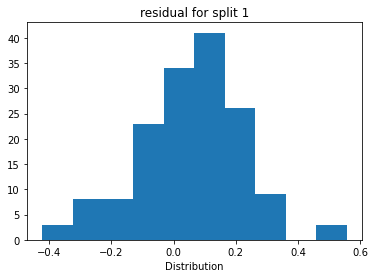

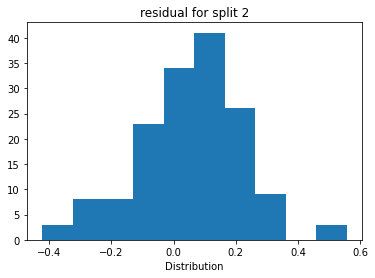

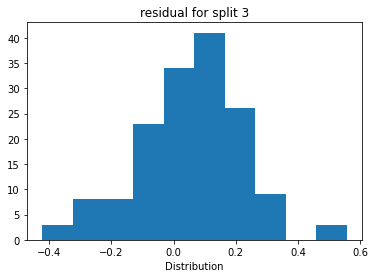

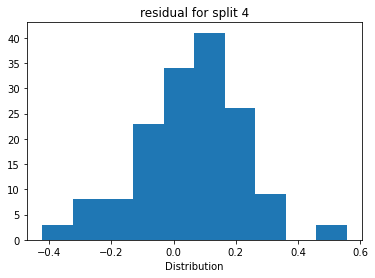

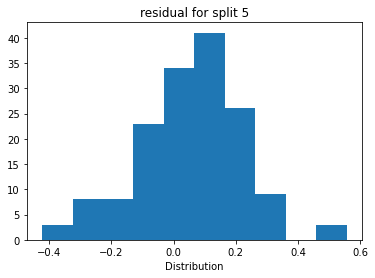

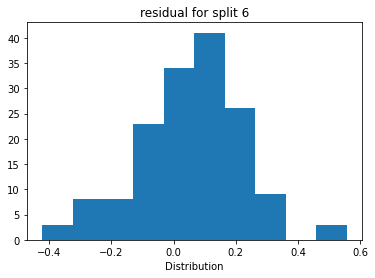

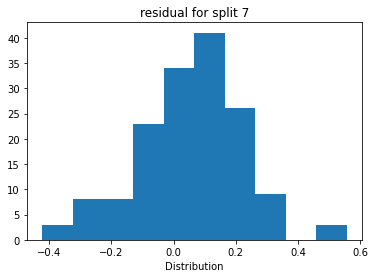

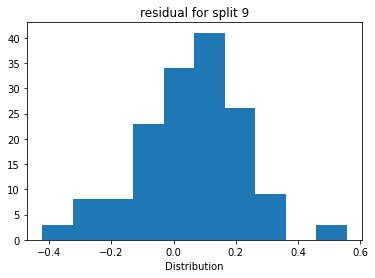

In [40]:
accuracy_scores=[]
mse=[]
rmse=[]
rsquared=[]
mae=[]

p=0

for train_index, test_index in cv.split(X):
    
    X_train_RandomForest, X_test_RandomForest =X_RandomForest.reindex(train_index), X_RandomForest.reindex(test_index)
    y_train_RandomForest, y_test_RandomForest = y_RandomForest.reindex(train_index), y_RandomForest.reindex(test_index).reset_index(drop=True)

    
    X_train_RandomForest = X_train_RandomForest.dropna()
    X_test_RandomForest = X_test_RandomForest.dropna()
    y_train_RandomForest = y_train_RandomForest.dropna()
    y_test_RandomForest = y_test_RandomForest.dropna()
    
    X_train_RandomForest= sc.fit_transform(X_train_RandomForest.iloc[:, 1:])  
    X_test_RandomForest= sc.fit_transform(X_test_RandomForest.iloc[:, 1:])  
    y_train_RandomForest=sc.fit_transform(y_train_RandomForest.values.reshape(-1,1)) 
    y_test_RandomForest= sc.fit_transform(y_test_RandomForest.values.reshape(-1, 1))  
    
    
    
    rf.fit(X_train_RandomForest, y_train_RandomForest.ravel())
    
    pred_rf = rf.predict(X_test_RandomForest)
    residual_rf= y_test_RandomForest-pred_rf
    fig, ax = plt.subplots()
    ax.hist( residual)
    print(" ")
    print('Accuracy for Split '+ str(p) + ':')
    # View accuracy score
    print(rf.score(X_test_RandomForest, y_test_RandomForest))
#     # Use the forest's predict method on the test data
    
    print('MSE: ' +str(mean_squared_error(y_test_RandomForest, pred_rf)))
    print('RMSE: ' + str(math.sqrt(mean_squared_error(y_test_RandomForest, pred_rf))))
    print('Rsquaed: '+ str(r2_score(y_test_RandomForest, pred_rf)))
    print('MAE: ' + str(mean_absolute_error(y_test_RandomForest, pred_rf)))
    print(" ")
    ax.set_xlabel("Distribution")
    ax.set_title('residual for split ' + str(p))
    
    p+=1
   
    accuracy_scores.append(rf.score(X_test_RandomForest, y_test_RandomForest))
    mse.append(mean_squared_error(y_test_RandomForest, pred_rf))
    rmse.append(math.sqrt(mean_squared_error(y_test_RandomForest, pred_rf)))
    rsquared.append(r2_score(y_test_RandomForest, pred_rf))
    mae.append(mean_absolute_error(y_test_RandomForest, pred_rf))
    
    
accuracy_avg= np.mean(accuracy_scores)
print('Average Accuracy ='+ str(accuracy_avg))

mse_avg= np.mean(mse)
print('Average MSE ='+ str(mse_avg))

rmse_avg= np.mean(rmse)
print('Average RMSE ='+ str(rmse_avg))

rsquared_avg= np.mean(rsquared)
print('Average Rsquared =' + str(rsquared_avg))


mae_avg= np.mean(mae)
print('Average MAE =' + str(mae_avg))






    
   
 

In [41]:
feature_list = list(X.iloc[:, 1:].columns)

importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];


Variable: 4. close             Importance: 0.85
Variable: Price_Rate_Of_Change Importance: 0.05
Variable: change_in_price      Importance: 0.02
Variable: up_days              Importance: 0.02
Variable: RSI                  Importance: 0.01
Variable: k_percent            Importance: 0.01
Variable: r_percent            Importance: 0.01
Variable: MACD                 Importance: 0.01
Variable: down_days            Importance: 0.0


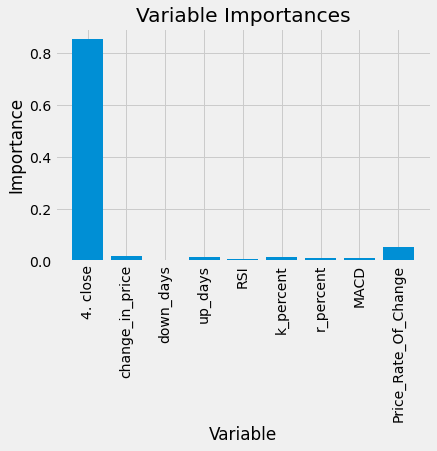

In [42]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

# LSTM

In [43]:
X_lstm= X
y_lstm = y

X_lstm.drop(['date'], axis = 1, inplace=True) 
# y_lstm.drop(['date'], axis = 1, inplace=True) 

In [44]:
X_lstm.head(10)

4. close  change_in_price  down_days  up_days        RSI  k_percent  \
13   119.990           -3.400      3.400    0.000  31.657415   9.800520   
14   120.530            0.540      0.000    0.540  35.615852  18.432671   
15   124.760            4.230      0.000    4.230  57.739658  71.342201   
16   125.570            0.810      0.000    0.810  60.721779  80.263158   
17   123.990           -1.580      1.580    0.000  52.399548  61.363636   
18   121.030           -2.960      2.960    0.000  40.423538  25.956938   
19   121.960            0.930      0.000    0.930  44.982099  37.081340   
20   119.980           -1.980      1.980    0.000  37.864750  12.771084   
21   121.085            1.105      0.000    1.105  43.610201  27.224199   
22   116.360           -4.725      4.725    0.000  29.947553   1.362398   

    r_percent      MACD  Price_Rate_Of_Change  
13 -90.199480 -0.544828             -0.024472  
14 -81.567329 -0.571785             -0.013262  
15 -28.657799 -0.328505              0.040534  
16 -19.736842 -0.088767              0.034434  
17 -38.636364 -0.003696              0.022935  
18 -74.043062 -0.128153              0.003649  
19 -62.918660 -0.161910              0.015572  
20 -87.228916 -0.317046             -0.020891  
21 -72.775801 -0.359258             -0.018681  
22 -98.637602 -0.708742             -0.030253

In [45]:
from tensorflow import keras
import numpy as np
from matplotlib import pyplot


accuracy_scores=[]
mse=[]
rmse=[]
rsquared=[]
mae=[]

for train_index, test_index in cv.split(X_lstm):
    X_train_lstm, X_test_lstm =X_lstm.reindex(train_index), X_lstm.reindex(test_index)
    y_train_lstm, y_test_lstm = y_lstm.reindex(train_index), y_lstm.reindex(test_index).reset_index(drop=True)
    
    
    
    X_train_lstm = X_train_lstm.dropna()
    X_test_lstm = X_test_lstm.dropna()
    y_train_lstm = y_train_lstm.dropna()
    y_test_lstm = y_test_lstm.dropna()
    
    X_train_lstm= sc.fit_transform(X_train_lstm.iloc[:, 1:])  
    X_test_lstm= sc.fit_transform(X_test_lstm.iloc[:, 1:])  
    y_train_lstm=sc.fit_transform(y_train_lstm.values.reshape(-1,1)) 
    y_test_lstm= sc.fit_transform(y_test_lstm.values.reshape(-1, 1))  
    
    
    
    X_train_lstm = np.reshape(X_train_lstm, (X_train_lstm.shape[0], X_train_lstm.shape[1], 1))
    X_test_lstm = np.reshape(X_test_lstm, (X_test_lstm.shape[0], X_test_lstm.shape[1], 1))
    
    inputs = keras.layers.Input(shape=(X_train_lstm.shape[1], X_train_lstm.shape[2]))
    x = keras.layers.LSTM(300, return_sequences= True)(inputs)
    x = keras.layers.Dropout(0.3)(x)
    x = keras.layers.LSTM(300, return_sequences=True)(x)
    x = keras.layers.Dropout(0.3)(x)
    x = keras.layers.LSTM(300)(x)
    outputs = keras.layers.Dense(1, activation='linear')(x)

    model = keras.Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer='adam', loss="mse", metrics=['accuracy','mean_squared_error', 'mae', 'mape'])
    model.summary()
    
    histoty=model.fit(
    X_train_lstm, y_train_lstm,
    epochs = 20,
    batch_size = 32,
    validation_split = 0.2)
    
    scores = model.evaluate(X_test_lstm, y_test_lstm, verbose=0)
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    accuracy_scores.append(scores[1])
    print("MSE:" + str((scores[2])))
    mse.append(scores[2])
    print("MAE:" + str((scores[3])))
    mae.append(scores[3])
    print('RMSE: ' + str(math.sqrt(scores[2])))
    
    y_pred = model.predict(X_test_lstm)
    
    print('R2 Score: ', r2_score(y_test_lstm, y_pred))
    rsquared.append(r2_score(y_test_lstm, y_pred))
    

#     pyplot.plot(history.history['loss'])
#     pyplot.plot(history.history['val_loss'])
#     pyplot.title('model train vs validation loss')
#     pyplot.ylabel('loss')
#     pyplot.xlabel('epoch')
#     pyplot.legend(['train', 'validation'], loc='upper right')
#     pyplot.show()
    
    


mse_avg= np.mean(mse)
print('Average MSE ='+ str(mse_avg))



rsquared_avg= np.mean(rsquared)
print('Average Accuracy ='+ str(rsquared_avg))

# rmse_avg= np.mean(rmse)
# print('Average RMSE ='+ str(scores[1]))

# rsquared_avg= np.mean(rsquared)
# print('Average Rsquared =' + str(rsquared_avg))


mae_avg= np.mean(mae)
print('Average MAE =' + str(mae_avg))
    
#     print('MSE =' + str(history.history['mean_squared_error']))
    # Trai the model
#      y_train_rf, y_test_rf = y.reindex(train_index), y.reindex(test_index).reset_index(drop=True)
    
#     y_train_rf = y_train_rf.dropna()
#     X_train_rf = X_train_rf.dropna()
#     y_test_rf = y_test_rf.dropna()
#     X_test_rf = X_test_rf.dropna()
#     rf.fit(X_train_rf.iloc[:, 1:], y_train_rf)

KeyboardInterrupt: 

In [52]:
def show_plot(data, title):
  plt.figure(figsize = (13, 5))
  plt.plot(data, linewidth = 3)
  plt.title(title)
  plt.grid()

In [55]:
starting_date='2015-01-01'
pd.options.mode.chained_assignment = None  # default='warn'

def pricePrediction_LR(symbol,days, starting_date):
#     obtain stock data
    stock_df= stock_data(symbol,starting_date)
    
    
    #     obtaining technical indicators
    stochastic_Oscillator(stock_df)
    calc_williams_r(stock_df)
    calc_macd(stock_df)
    calc_price_rate_of_change(stock_df)
    
#     set the trading window we are trying to predict
    stock_df_targeted = trading_window(stock_df,days)
# #     remove the last column of the data as it will be null
#     stock_df_targeted= stock_df_targeted[:-1]

    
    stock_df_targeted.reset_index(inplace = True)
    stock_df_targeted = stock_df_targeted.dropna()
    
    stock_df_targeted_scaled= stock_df_targeted
    stock_df_targeted_scaled.head(10)
    stock_df_targeted_scaled.drop(['Ticker','1. open','2. high','3. low', '5. adjusted close', '6. volume', '8. split coefficient', 'low_14','high_14','MACD_EMA'], axis = 1, inplace=True)
    
    
    stock_df_targeted_scaled = sc.fit_transform(stock_df_targeted_scaled.drop(columns = ['date']))
    
    # Creating Feature and Target
    X = stock_df_targeted_scaled[:,:6]
    y = stock_df_targeted_scaled[:,6:]
    
    split = int(0.65 * len(X))
    X_train = X[:split]
    y_train = y[:split]
    X_test = X[split:]
    y_test = y[split:]

    show_plot(X_train, 'Training Data')
    show_plot(X_test, 'Testing Data')
    
    regression_model = Ridge()
    regression_model.fit(X_train, y_train)
    
    lr_accuracy = regression_model.score(X_test, y_test)
    predicted_prices = regression_model.predict(X)
    
    
    print("Linear Regression Score: ", lr_accuracy)
    print('RMSE: ' + str(math.sqrt(mean_squared_error(y, predicted_prices))))
    print('Rsquared '+ str(r2_score(y, predicted_prices)))
    print('MAE: ' + str(mean_absolute_error(y, predicted_prices)))
    

    
    Predicted = []
    for i in predicted_prices:
        Predicted.append(i[0])
        
    close = []
    for i in stock_df_targeted_scaled:
        close.append(i[0])
    
    df_predicted = stock_df_targeted[['date']]
    df_predicted['Close'] = close
    df_predicted['Prediction'] = Predicted
    
    interactive_plot(df_predicted, "Original Vs. Prediction")
    
    

Linear Regression Score:  0.8977012655293357
RMSE: 0.016930119755725826
Rsquared 0.9946986518668928
MAE: 0.012253122021437074


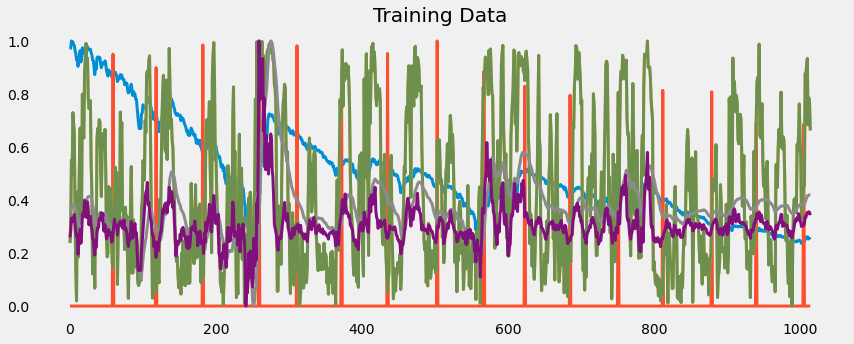

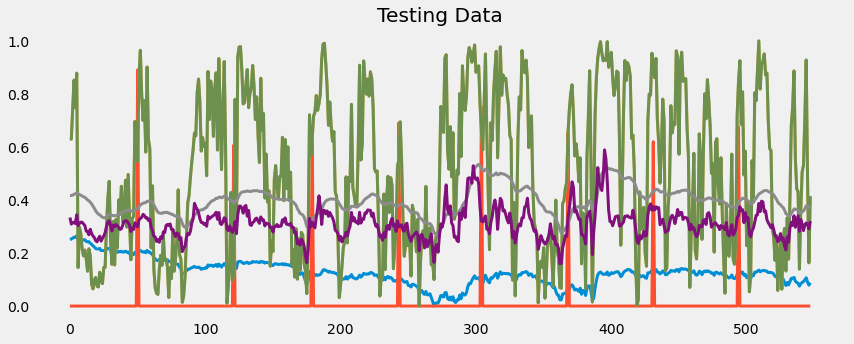

In [56]:
pricePrediction_LR('VOO', 1,starting_date )

In [60]:
def pricePrediction_RandomForest(symbol,days, starting_date):
    p=0
    mse=[]
    rmse=[]
    rsquared=[]
    mae=[]
    
    #     obtain stock data
    stock_df= stock_data(symbol,starting_date)
    
    
    #     obtaining technical indicators
    stochastic_Oscillator(stock_df)
    calc_williams_r(stock_df)
    calc_macd(stock_df)
    calc_price_rate_of_change(stock_df)
    
    #     set the trading window we are trying to predict
    stock_df_targeted = trading_window(stock_df,days)
    
    stock_df_targeted.reset_index(inplace = True)
    stock_df_targeted = stock_df_targeted.dropna()
    
    stock_df_targeted_scaled= stock_df_targeted
#     stock_df_targeted_scaled.head(10)
    stock_df_targeted_scaled.drop(['Ticker','2. high','3. low', '5. adjusted close','7. dividend amount' ,'6. volume', '8. split coefficient', 'low_14','high_14','MACD_EMA'], axis = 1, inplace=True)
    
    
    stock_df_targeted_scaled = sc.fit_transform(stock_df_targeted_scaled.drop(columns = ['date']))
    
#     # Creating Feature and Target
    X = stock_df_targeted_scaled[:,:6]
    y = stock_df_targeted_scaled[:,6:]
     
    split = int(0.65 * len(X))
    X_train = X[:split]
    y_train = y[:split]
    X_test = X[split:]
    y_test = y[split:]

    show_plot(X_train, 'Training Data')
    show_plot(X_test, 'Testing Data')
    
    rf = RandomForestRegressor()
    
    rf.fit(X_train, y_train.ravel()) 
    pred_rf = rf.predict(X)
  
    print('MSE: ' +str(mean_squared_error(y, pred_rf)))
    print('RMSE: ' + str(math.sqrt(mean_squared_error(y, pred_rf))))
    print('Rsquaed: '+ str(r2_score(y, pred_rf)))
    print('MAE: ' + str(mean_absolute_error(y, pred_rf)))
    print('')
    
    
    Predicted = []
    for i in pred_rf:
        Predicted.append(i)
        
    close = []
    for i in stock_df_targeted_scaled:
        close.append(i[0])
        

    df_predicted = stock_df_targeted[['date']]
    df_predicted['Close'] = close
    df_predicted['Prediction'] = Predicted
    
    interactive_plot(df_predicted, "Original Vs. Prediction for " )
   
    

MSE: 0.005099931676894885
RMSE: 0.07141380592640953
Rsquaed: 0.9056741728007307
MAE: 0.04078118590266167



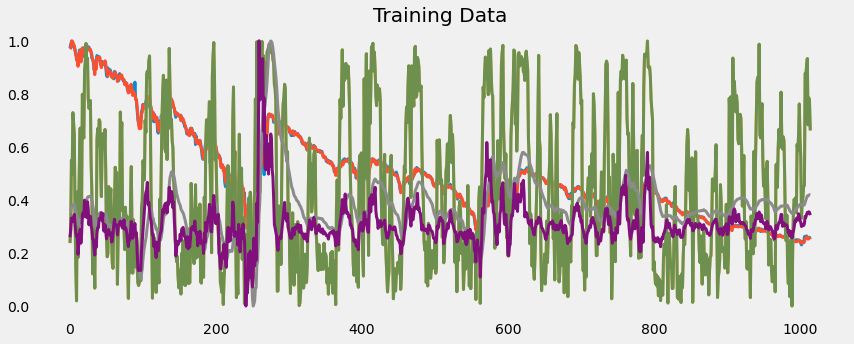

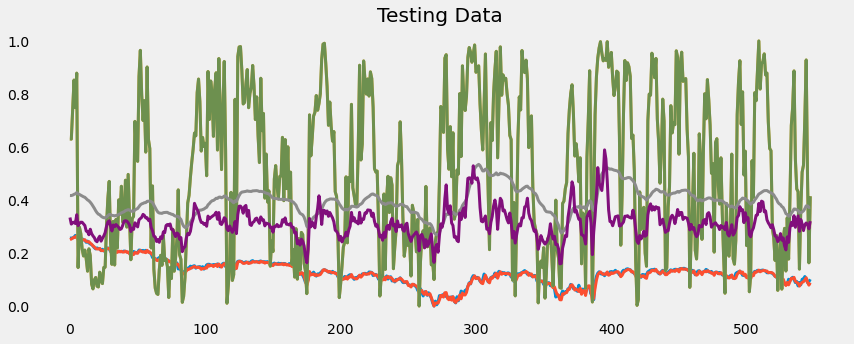

In [61]:
pricePrediction_RandomForest('VOO', 1,starting_date )

MSE: 0.0050301858106736996
RMSE: 0.07092380284977463
Rsquaed: 0.9069641580283462
MAE: 0.04048247809541695



MSE: 0.007650747910798474
RMSE: 0.08746855383964271
Rsquaed: 0.8596995026393367
MAE: 0.05333525419357077



MSE: 0.008552039615809403
RMSE: 0.09247723836604012
Rsquaed: 0.8408833932547788
MAE: 0.056493469283750083



MSE: 0.008224831771540573
RMSE: 0.09069085825782316
Rsquaed: 0.8518054518643919
MAE: 0.0566214100512721



MSE: 0.009233696474888987
RMSE: 0.09609212493690097
Rsquaed: 0.8426906418248901
MAE: 0.05907157304269195



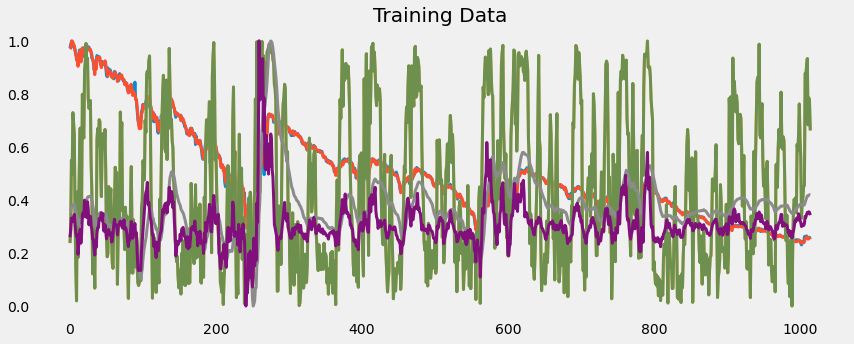

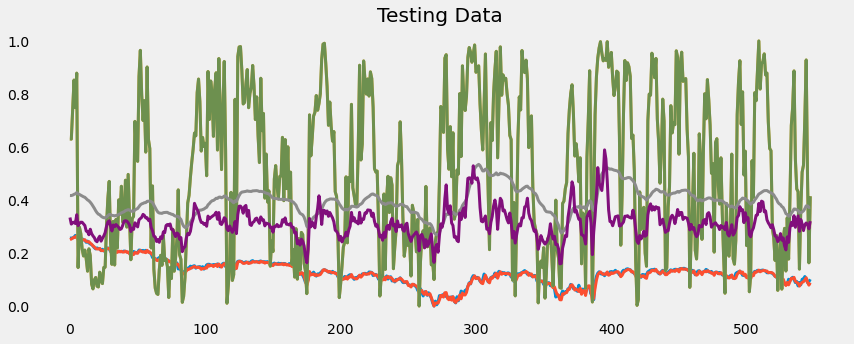

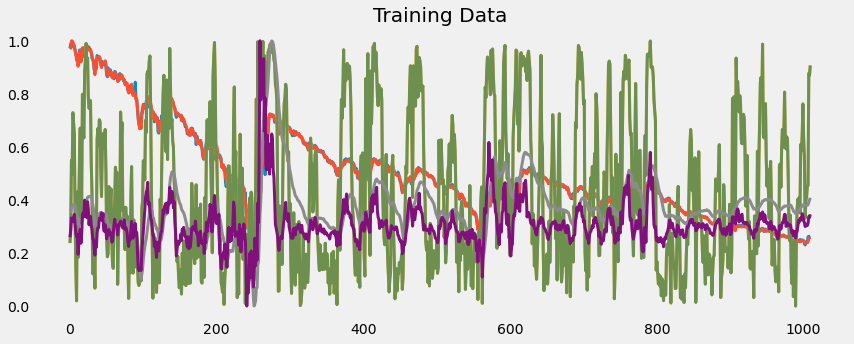

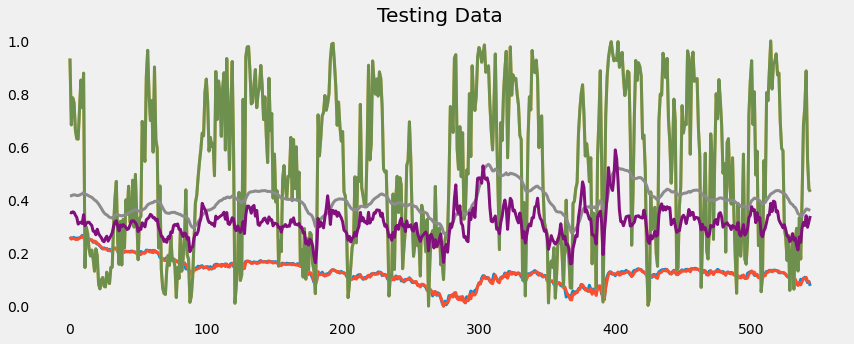

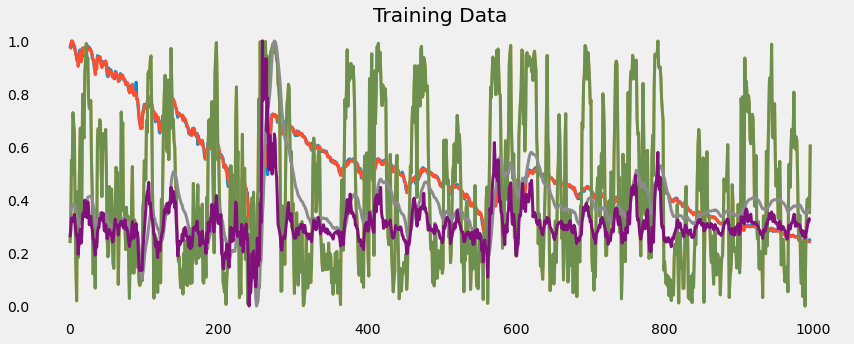

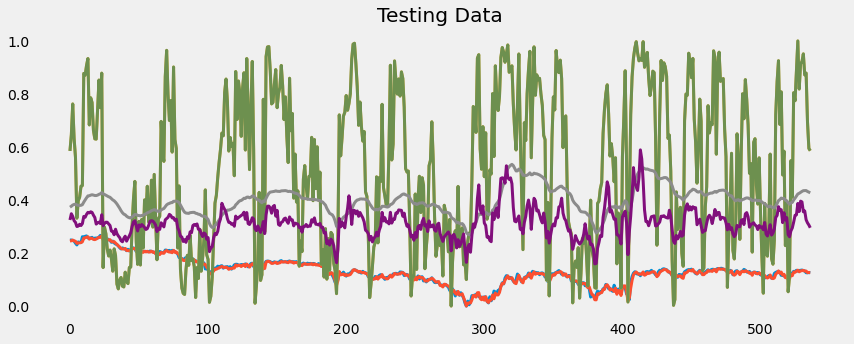

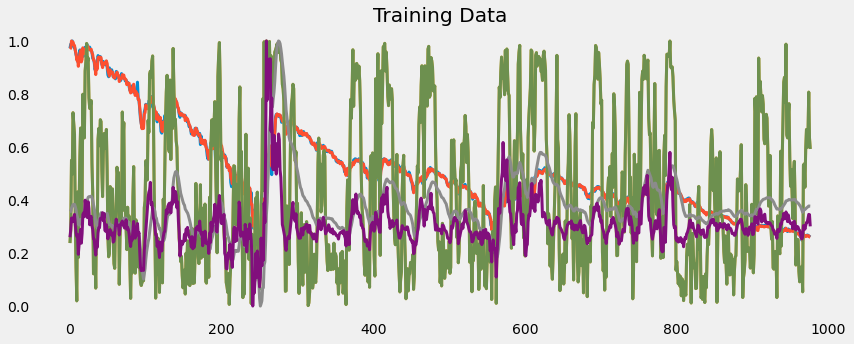

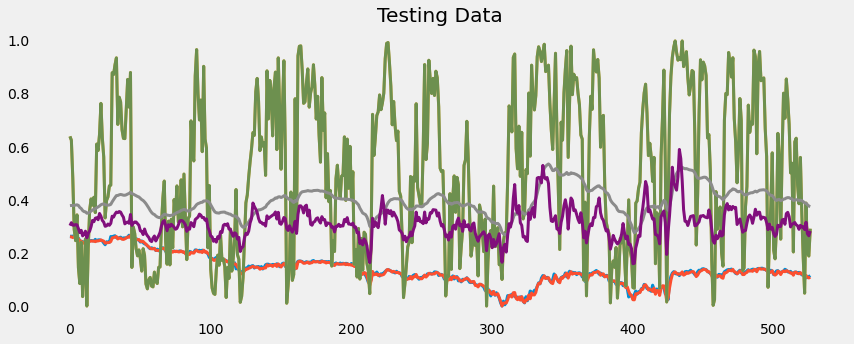

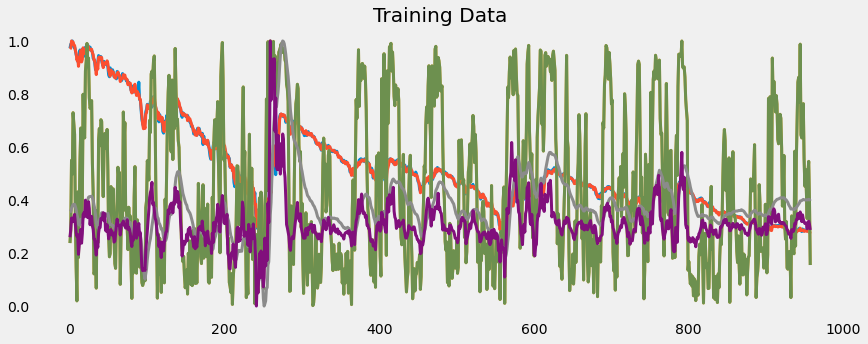

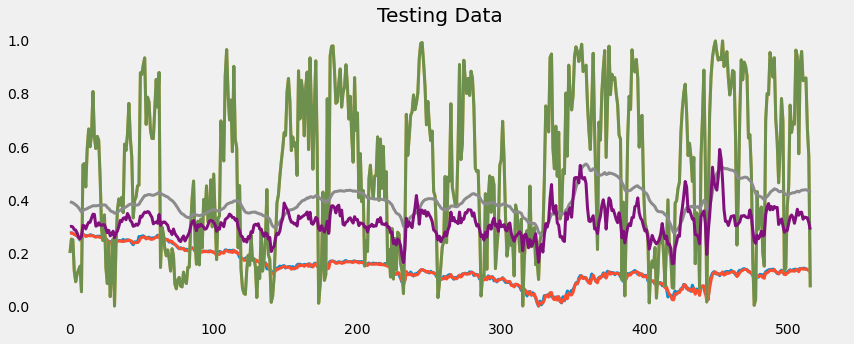

In [62]:
windows = [1,10,30,60,90]
for i in windows:
    pricePrediction_RandomForest('VOO', i,starting_date )



In [63]:
def pricePrediction_LSTM(symbol,days, starting_date):
#     obtain stock data
    stock_df= stock_data(sym,starting_date)
    
    
    #     obtaining technical indicators
    stochastic_Oscillator(stock_df)
    calc_williams_r(stock_df)
    calc_madcd(stock_df)
    calc_price_rate_of_change(stock_df)
    
    stock_df.reset_index(inplace = True)
   
    #     set the trading window we are trying to predict
    stock_df_targeted = trading_window(stock_df,days)
    stock_df_targeted.drop(['Ticker','1. open','2. high','3. low', '5. adjusted close', '6. volume','7. dividend amount','8. split coefficient', 'low_14','high_14','MACD_EMA'], axis = 1, inplace=True)
    stock_df_targeted.dropna(inplace=True)
    training_data_X = stock_df_targeted.iloc[:, 1:6].values
    training_data_y = stock_df_targeted.iloc[:, 6:].values
    
    stock_df_targeted_scaled= sc.fit_transform(stock_df_targeted.drop(columns = ['date']))

    X = sc.fit_transform(training_data_X)
    y = sc.fit_transform(training_data_y)
    
    
    # Convert the data into array format
    X = np.asarray(X)
    y = np.asarray(y)
    
    # Split the data
    split = int(0.7 * len(X))
    X_train = X[:split]
    y_train = y[:split]
    X_test = X[split:]
    y_test = y[split:]
    
    # Reshape the 1D arrays to 3D arrays to feed in the model
    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
    X_train.shape, X_test.shape

    # Create the model
    inputs = keras.layers.Input(shape=(X_train.shape[1], X_train.shape[2]))
    x = keras.layers.LSTM(150, return_sequences= True)(inputs)
    x = keras.layers.Dropout(0.3)(x)
    x = keras.layers.LSTM(150, return_sequences=True)(x)
    x = keras.layers.Dropout(0.3)(x)
    x = keras.layers.LSTM(150)(x)
    outputs = keras.layers.Dense(1, activation='linear')(x)

    model = keras.Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer='adam', loss="mse", metrics=['mean_squared_error', 'mae'])
    model.summary()
    
    # Trai the model
    history = model.fit(
        X_train, y_train,
        epochs = 20,
        batch_size = 32,
        validation_split = 0.2
    )
    
    predicted = model.predict(X)
    
    test_predicted = []

    for i in predicted:
      test_predicted.append(i[0])
    
    close = []
    for i in stock_df_targeted_scaled:
        close.append(i[0])
        
    df_predicted = stock_df_targeted[['date']]
    df_predicted['Close'] = close
    df_predicted['Prediction'] = predicted
    
#     interactive_plot(df_predicted, "Original Vs. Prediction for " )
        
    
    print("MSE:" + str((scores[0])))
    print("MAE:" + str((scores[1])))
    print('R2 Score: ', r2_score(y, predicted))
    # Plot the data
    interactive_plot(df_predicted, "Original Vs Prediction")
    
   

In [64]:
pricePrediction_LSTM('VOO', 1,starting_date )

NameError: name 'calc_madcd' is not defined